In [3]:
! unzip /content/drive/MyDrive/응용머신러닝/archive.zip

Archive:  /content/drive/MyDrive/응용머신러닝/archive.zip
  inflating: ElonTweets(Sentiment) 10-28-22.csv  
  inflating: ElonTweets(Sentiment).csv  
  inflating: ElonTweets(Sentiment)_11-9-22.csv  


In [4]:
import pandas as pd

df = pd.read_csv('ElonTweets(Sentiment)_11-9-22.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,2022-11-10 01:38:32+00:00,1590519242805641216,"@micsolana In days to come, we’ll add granular...",elonmusk,NaN,348,133,1557,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.7305445]"
1,1,1,2022-11-10 00:45:30+00:00,1590505894210834434,@micsolana We are changing the text to say “Le...,elonmusk,NaN,1224,598,9464,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.58761513]"
2,2,2,2022-11-09 23:14:53+00:00,1590483090367197185,@guslabu @tomwarren 🎯😎💰,elonmusk,NaN,496,122,2066,und,Twitter for iPhone,115241851,130,True,2022-11-09,"guslabu,tomwarren","['positive', 0.5533905]"
3,3,3,2022-11-09 23:04:29+00:00,1590480472613998593,@StarringShane Subscription Blue is better tha...,elonmusk,NaN,2253,1041,17872,en,Twitter for iPhone,115241851,130,True,2022-11-09,StarringShane,"['positive', 0.47260958]"
4,4,4,2022-11-09 19:29:02+00:00,1590426255018848256,@PPathole The goal of Twitter DMs is to supers...,elonmusk,NaN,1001,513,10904,en,Twitter for iPhone,115241851,130,True,2022-11-09,PPathole,"['neutral', 0.82402253]"


In [5]:
x = df.iloc[:, 2:]
x.tail()

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
17714,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk,NaN,28,9,52,en,Twitter for iPhone,115242467,130,True,2011-12-03,_,"['negative', 0.5067324]"
17715,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,NaN,32,30,66,en,Twitter for iPhone,115242467,130,True,2011-12-03,_,"['positive', 0.55860823]"
17716,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,NaN,29,13,76,en,Twitter Web Client,115242467,130,True,2011-12-01,_,"['neutral', 0.6384011]"
17717,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,115242467,130,True,2011-12-01,_,"['positive', 0.9733198]"
17718,2010-06-04 18:31:57+00:00,15434727182,"Please ignore prior tweets, as that was someon...",elonmusk,NaN,1035,600,6116,en,Twitter Web Client,115242467,130,True,2010-06-04,_,"['neutral', 0.5472165]"


In [6]:
# 결측값 확인
print(x.shape)
print(x.isna().any())

for col in x.columns:
  temp = x[col].isnull().sum()
  if temp > 0:
    print(f'{col} 이 {temp}개의 null values를 가지고 있음!')

(17719, 16)
Datetime                False
Tweet Id                False
Text                    False
Username                False
location                 True
reply count             False
retweet count           False
like count              False
language                False
Twitter Access Point    False
Follower Count          False
 Friends Count          False
verified                False
Date                    False
mentions                False
sentiment               False
dtype: bool
location 이 17719개의 null values를 가지고 있음!


In [7]:
# location null 값으로 채워져 있어 > 삭제
x  = x.drop(['location'], axis = 1)
x.shape

(17719, 15)

In [8]:
# 1개의 value 만 가지고 있는 열 확인
print(x.nunique())

Datetime                17716
Tweet Id                17719
Text                    17502
Username                    1
reply count              3920
retweet count            4788
like count              11725
language                   44
Twitter Access Point        9
Follower Count            410
 Friends Count              1
verified                    1
Date                     2553
mentions                 8145
sentiment               15339
dtype: int64


In [9]:
# elon musk username, friends count 본인 1명 / verified no needed
# mentions (멘션된 user) 에 대한 정보 x
print(x['Twitter Access Point'].values)
# 이것 역시 불필요 삭제

# sentiment analysis 에 필요한 피처만 추출
features = x.loc[:, ['Date', 'reply count', 'retweet count', 'like count', 'sentiment']]
features.head()

['Twitter for iPhone' 'Twitter for iPhone' 'Twitter for iPhone' ...
 'Twitter Web Client' 'Twitter Web Client' 'Twitter Web Client']


,Date,reply count,retweet count,like count,sentiment
0,2022-11-10,348,133,1557,"['neutral', 0.7305445]"
1,2022-11-10,1224,598,9464,"['neutral', 0.58761513]"
2,2022-11-09,496,122,2066,"['positive', 0.5533905]"
3,2022-11-09,2253,1041,17872,"['positive', 0.47260958]"
4,2022-11-09,1001,513,10904,"['neutral', 0.82402253]"


In [10]:
# sentiment value 분리 시키기 
import numpy as np

stop_words = ["'", "[", "]", " "] # 다 string 으로 되어 있어 불용어 설정
features['sentiment_str'] = [i for i in range(0, len(x))]
features['sentiment_num'] = [i for i in range(0, len(x))]

for idx, value in enumerate(features['sentiment']):
  for i in stop_words:
    value = value.replace(i, "") #불용어 모두 제거
  sent, num = value.split(',') 
  features['sentiment_str'][idx] = sent
  features['sentiment_num'][idx] = num  
  features['sentiment_num'][idx] = float(features['sentiment_num'][idx])

features.head()

<ipython-input-10-3b95caa04d2a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['sentiment_str'][idx] = sent
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-10-3b95caa04d2a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['sentiment_num'][idx] = num


,Date,reply count,retweet count,like count,sentiment,sentiment_str,sentiment_num
0,2022-11-10,348,133,1557,"['neutral', 0.7305445]",neutral,0.730545
1,2022-11-10,1224,598,9464,"['neutral', 0.58761513]",neutral,0.587615
2,2022-11-09,496,122,2066,"['positive', 0.5533905]",positive,0.553391
3,2022-11-09,2253,1041,17872,"['positive', 0.47260958]",positive,0.47261
4,2022-11-09,1001,513,10904,"['neutral', 0.82402253]",neutral,0.824023


In [11]:
# 7) simplify the categories
# Checking number of unique categories present in the " sentiment "
print(features['sentiment_str'].value_counts())
features['sentiment_sr'] = features['sentiment_str']


# 긍정, 중립, 부정의 정도에 따른 주식 가격 예측 

# 시나리오 1)
# neutral 0, positive +1, negative -1  > 한 날짜 게시글 여러개 > 하루를 기준으로 종가를 예측할 것이기 때문에, 비율에 맞는 score 로 환산하여 하나의 feature 를 만들기 위함
features['sentiment_sr'] = features['sentiment_sr'].replace(['neutral'], 0)
features['sentiment_sr'] = features['sentiment_sr'].replace(['positive'], 1)
features['sentiment_sr'] = features['sentiment_sr'].replace(['negative'], -1)
features.head()

neutral     10353
positive     5278
negative     2088
Name: sentiment_str, dtype: int64


,Date,reply count,retweet count,like count,sentiment,sentiment_str,sentiment_num,sentiment_sr
0,2022-11-10,348,133,1557,"['neutral', 0.7305445]",neutral,0.730545,0
1,2022-11-10,1224,598,9464,"['neutral', 0.58761513]",neutral,0.587615,0
2,2022-11-09,496,122,2066,"['positive', 0.5533905]",positive,0.553391,1
3,2022-11-09,2253,1041,17872,"['positive', 0.47260958]",positive,0.47261,1
4,2022-11-09,1001,513,10904,"['neutral', 0.82402253]",neutral,0.824023,0


In [12]:
# retweet count와 like count를 해당 sentiment의 가중치 피처로 변경

# 1) commitment = retweet + like > 하나의 컬럼으로 합치기
features['commitment count'] = features['retweet count'] + features['like count']

# 2) date를 기준으로 각 sentiment 마다의 commitment count 합을 구함
feature_weight = features.groupby(['Date','sentiment_sr'])['commitment count'].sum()

# 3) sentiment 가중치 구하기
# 가중치 = 특정 날짜 기준)  각 sentiment 의 commitment / 전체 commitment  
sentiment_weight =  pd.DataFrame(feature_weight / features.groupby('Date')['commitment count'].sum())
sentiment_weight.head(10)


commitment count
Date       sentiment_sr                  
2010-06-04  0                    1.000000
2011-12-01  0                    0.296667
            1                    0.703333
2011-12-03 -1                    0.388535
            1                    0.611465
2011-12-04  1                    1.000000
2011-12-21 -1                    0.047928
            0                    0.739023
            1                    0.213049
2011-12-22  0                    0.617064

In [13]:
sentiment_weight = sentiment_weight.reset_index(level = 'sentiment_sr')  # groupby 함수로 지정된 multiindex 풀기 함수(reset_index, 참고: https://jimmy-ai.tistory.com/10)
sentiment_score = sentiment_weight['sentiment_sr'] * sentiment_weight['commitment count']
sentiment_score = sentiment_score.groupby('Date').sum()

In [14]:
sentiment_score

Date
2010-06-04    0.000000
2011-12-01    0.703333
2011-12-03    0.222930
2011-12-04    1.000000
2011-12-21    0.165121
                ...   
2022-11-06   -0.593477
2022-11-07    0.004810
2022-11-08   -0.118993
2022-11-09    0.258128
2022-11-10    0.000000
Length: 2553, dtype: float64

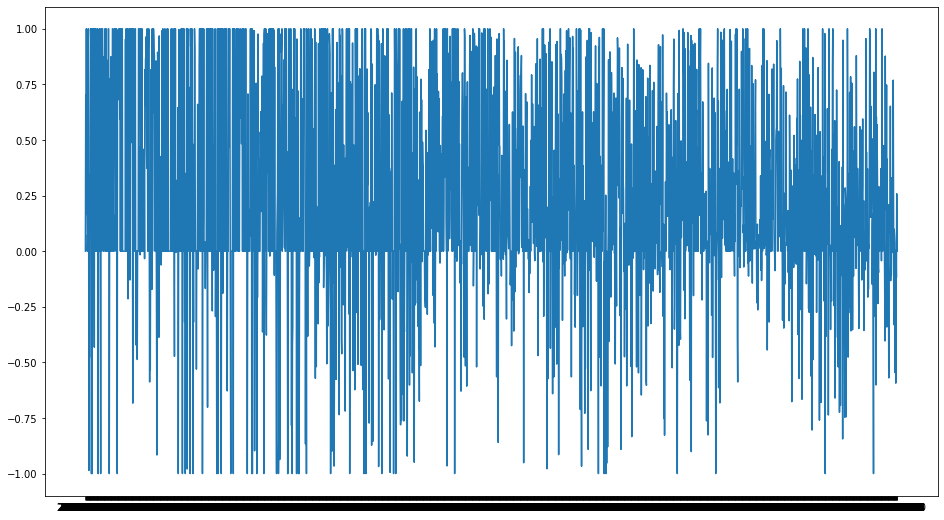

In [15]:
# 감정 점수 그래프 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
plt.plot(sentiment_score)
plt.show()

In [62]:
# 시나리오 2)
# -1, 0, 1 로 설정하여 값이 왔다갔다하는 문제 > 이후 분석에서 rvalue 0.0x 수준으로 나오는 문제 해결하고자
# 제일 큰 sentiment를 그냥 main 으로 설정 
# 음수값 설정 x
# 라벨 encoding 하지 않고 일부러 직접 정의(encoding은 수치적 label x) > 하지만, negative-neutral-positive 간의 수치적 값을 부여하고 싶었기 때문
features['sentiment_sr2'] = features['sentiment_str']
features['sentiment_sr2'] = features['sentiment_sr2'].replace(['negative'], 0) #negative
features['sentiment_sr2'] = features['sentiment_sr2'].replace(['neutral'], 1)  #neutral
features['sentiment_sr2'] = features['sentiment_sr2'].replace(['positive'], 2)  #positive
features['sentiment_sr2']


0        1
1        1
2        2
3        2
4        1
        ..
17714    0
17715    2
17716    1
17717    2
17718    1
Name: sentiment_sr2, Length: 17719, dtype: int64

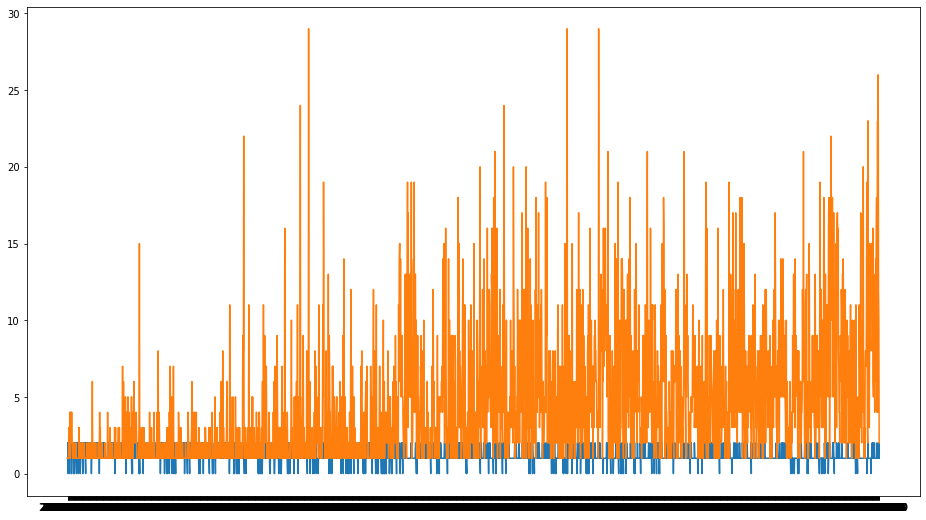

In [63]:
# 감정 점수 그래프 확인
cnt = pd.Series(np.ones(shape = (len(features['sentiment_sr2']),), dtype=np.int8))
sentiment_score2 = features.loc[:, ['Date','sentiment_sr2']]
sentiment_score2 = pd.concat([sentiment_score2, cnt], axis = 1)
sentiment_score2 = sentiment_score2.rename(columns={0 : 'cnt'})
sentiment_score2 = sentiment_score2.groupby(['Date', 'sentiment_sr2']).count()
sentiment_score2 = sentiment_score2.reset_index('sentiment_sr2')
sentiment_score_for_merge = sentiment_score2.groupby('Date')['cnt'].max()
sentiment_score2 = pd.merge(sentiment_score2, sentiment_score_for_merge, on = ['Date', 'cnt'])


import seaborn as sns

plt.figure(figsize=(16, 9))
plt.plot(sentiment_score2)
plt.show()

In [64]:
print(sentiment_score2) # 여전히 중복 date 존재 > 평균 값으로 받기

            sentiment_sr2  cnt
Date                          
2010-06-04              1    1
2011-12-01              1    1
2011-12-01              2    1
2011-12-03              0    1
2011-12-03              2    1
...                   ...  ...
2022-11-06              1    4
2022-11-07              1   26
2022-11-08              1   12
2022-11-09              2   10
2022-11-10              1    2

[2936 rows x 2 columns]


In [65]:
sentiment_score2 = sentiment_score2.groupby('Date')['sentiment_sr2'].mean()
sentiment_score2

Date
2010-06-04    1.0
2011-12-01    1.5
2011-12-03    1.0
2011-12-04    2.0
2011-12-21    1.5
             ... 
2022-11-06    1.0
2022-11-07    1.0
2022-11-08    1.0
2022-11-09    2.0
2022-11-10    1.0
Name: sentiment_sr2, Length: 2553, dtype: float64

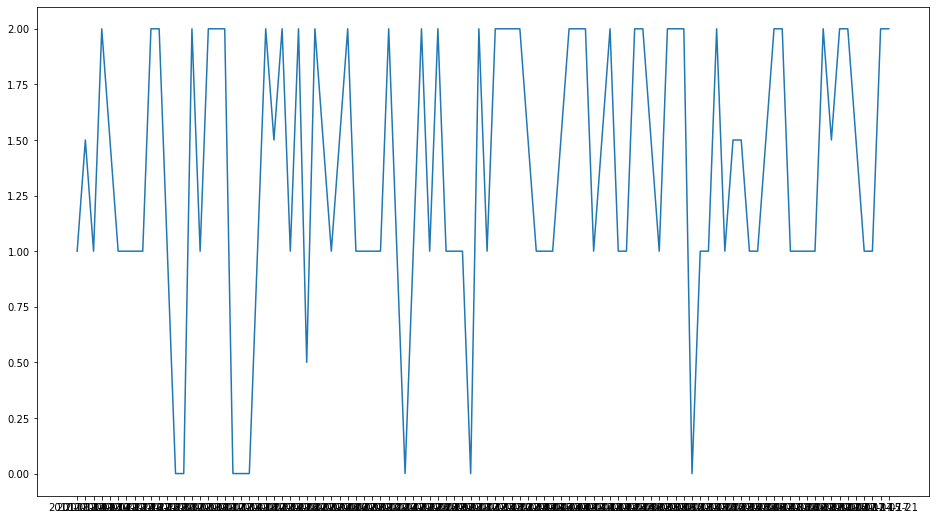

In [66]:
# 작은 부분 확인용
plt.figure(figsize=(16, 9))
plt.plot(sentiment_score2[:100])
plt.show()

In [67]:
# date time? or date 어떤 것을 기준으로 할 것이냐?  
# 주식 주가는 수정 종가를 기준으로 할 것!
# sentiment 에 따른 종가를 추출 해야 하기 때문에 이것을 확인!

In [68]:
# 테슬라 주가 data download
!pip install yfinance
import yfinance as yf

tsla_df = yf.download('TSLA', start='2010-06-04', end = '2022-11-10', progress = False)
print('Tesla Stock Data')
print(tsla_df)
print('\n')

# 2010년 6월 29일 > 테슬라 상장일
# 처음 시작 날짜 6월 4일 > tesla 관련 x > neutral > 삭제 >2011년 12월 1일부터 활발히 시작
# 2011년 12월 1일 부터 범위 설정

tsla_df = yf.download('TSLA', start='2010-12-01', end = '2022-11-10', progress = False)
print('Tesla Stock Data')
print(tsla_df)
print('\n')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Tesla Stock Data
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2022-11-03  211.360001  221.199997  210.139999  215.309998  215.309998   
2022-11-04  222.600006  223.800003  203.080002  207.470001  207.470001   
2022-11-07  208.649994  208.899994  196.660004  197.080002  197.080002   
2022-11-08  194.020004  195.199997  186.750000  191.300003  191.300003   
2022-11-09  190.779999  195.889999  177.119995  177.589996  177.589996   

               Volum

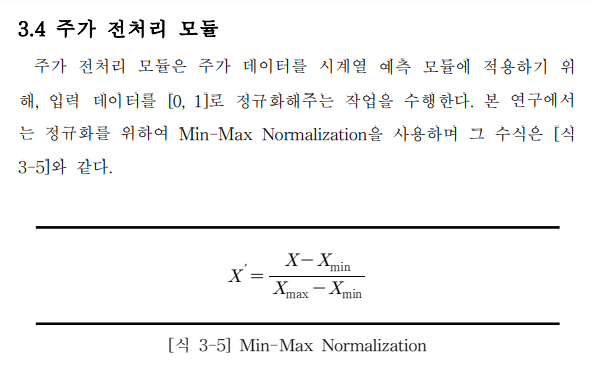

In [69]:
# 정규화 작업
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
tsla_df_scaled = scaler.fit_transform(tsla_df[scale_cols])
tsla_df_scaled = pd.DataFrame(tsla_df_scaled, index = tsla_df.index)
tsla_df_scaled.columns = scale_cols

tsla_df_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-01,0.002291,0.002284,0.002035,0.002043,0.002043,0.017457
2010-12-02,0.001989,0.001942,0.001664,0.001717,0.001717,0.029117
2010-12-03,0.001663,0.001611,0.001610,0.001576,0.001576,0.015165
2010-12-06,0.001556,0.001482,0.001393,0.001384,0.001384,0.017048
2010-12-07,0.001416,0.001635,0.001474,0.001588,0.001588,0.017656
...,...,...,...,...,...,...
2022-11-03,0.511948,0.531983,0.516334,0.523493,0.523493,0.058150
2022-11-04,0.539362,0.538278,0.498870,0.504302,0.504302,0.104185
2022-11-07,0.505339,0.502202,0.482989,0.478868,0.478868,0.099202


In [70]:
# sentiment score 와 테슬라 stock price > Date 맞추기

# x1, x2, y 지정

# x1 : 시나리오 1번
sentiment_score = pd.DataFrame(sentiment_score)
print(sentiment_score.index) # 해당 date 는 dateobjec type이 아님
sentiment_score = sentiment_score.reset_index()
sentiment_score['Date'] = pd.to_datetime(sentiment_score['Date'],format='%Y-%m-%d')
sentiment_score = sentiment_score.set_index('Date')
x1 = sentiment_score 

# x2: 시나리오 2번
sentiment_score2 = pd.DataFrame(sentiment_score2)
print(sentiment_score2.index) # 해당 date 는 dateobjec type이 아님
sentiment_score2 = sentiment_score2.reset_index()
sentiment_score2['Date'] = pd.to_datetime(sentiment_score2['Date'],format='%Y-%m-%d')
sentiment_score2 = sentiment_score2.set_index('Date')
x2 = sentiment_score2 

y = pd.DataFrame(tsla_df_scaled['Adj Close'])

# pandas merge 함수 사용하여 date를 기준으로 합치기
lr_df1 = pd.merge(x1, y, on= 'Date')
lr_df2 = pd.merge(x2, y, on= 'Date')
lr_df1 = lr_df1.rename(columns = {0: 'sentiment_score'})
# lr_df2 = lr_df2.rename(columns = {': 'sentiment_score2'})
print(lr_df1)
print(lr_df2)
# 다시 x, y 지정
x1 = lr_df1['sentiment_score']
x2 = lr_df2['sentiment_sr2']
y = lr_df1['Adj Close']

Index(['2010-06-04', '2011-12-01', '2011-12-03', '2011-12-04', '2011-12-21',
       '2011-12-22', '2011-12-24', '2011-12-26', '2011-12-27', '2011-12-28',
       ...
       '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
       '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10'],
      dtype='object', name='Date', length=2553)
Index(['2010-06-04', '2011-12-01', '2011-12-03', '2011-12-04', '2011-12-21',
       '2011-12-22', '2011-12-24', '2011-12-26', '2011-12-27', '2011-12-28',
       ...
       '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
       '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10'],
      dtype='object', name='Date', length=2553)
            sentiment_score  Adj Close
Date                                  
2011-12-01         0.703333   0.001758
2011-12-21         0.165121   0.000937
2011-12-22         0.382936   0.000969
2011-12-27         0.000000   0.001100
2011-12-28         1.000000   

In [71]:
import matplotlib .pyplot as plt
from scipy import stats

# linear regression 계산
result1 = stats.linregress(x1, y)
result2 = stats.linregress(x2, y)
print(result1.rvalue, result2.rvalue)  
# x와 y의 rvalue 가 거의 0에 가깝게 나오면서, relationship이 커보이지 않음
# 그나마 시나리오2) 가 좀 더 높게 나온 것을 확인할 수 있음

-0.09890216692600194 -0.1020641798812958


In [73]:
# 가격의 변화량을 y를 하루동안의 open , adj close 값의 차이로 설정

# y2 지정
y2 = pd.DataFrame(tsla_df_scaled['Adj Close'] - tsla_df_scaled['Open'])
#print(y2)

y2 = y2.rename(columns = {0 : 'Difference'})
# pandas merge 함수 사용하여 date를 기준으로 합치기
lr_df12 = pd.merge(x1, y2, on='Date')
lr_df22 = pd.merge(x2, y2, on='Date')
print(lr_df12)
print(lr_df22)

# 다시 y21, y22 지정
y21 = lr_df12['Difference']
y22 = lr_df22['Difference']

# rvalue 계산
result3 = stats.linregress(x1, y21)
result4 = stats.linregress(x2, y22)
print(result3.rvalue, result4.rvalue) 
# 여기서도 유의미하다고는 할 수는 없지만, 시나리오 2)가 더 좋은 rvalue 가 나옴

            sentiment_score  Difference
Date                                   
2011-12-01         0.703333    0.000003
2011-12-21         0.165121   -0.000060
2011-12-22         0.382936    0.000023
2011-12-27         0.000000    0.000144
2011-12-28         1.000000   -0.000082
...                     ...         ...
2022-11-03         0.039009    0.011545
2022-11-04        -0.546247   -0.035060
2022-11-07         0.004810   -0.026471
2022-11-08        -0.118993   -0.004938
2022-11-09         0.258128   -0.030597

[1788 rows x 2 columns]
            sentiment_sr2  Difference
Date                                 
2011-12-01            1.5    0.000003
2011-12-21            1.5   -0.000060
2011-12-22            1.0    0.000023
2011-12-27            1.0    0.000144
2011-12-28            2.0   -0.000082
...                   ...         ...
2022-11-03            2.0    0.011545
2022-11-04            1.0   -0.035060
2022-11-07            1.0   -0.026471
2022-11-08            1.0   -0.004938

In [74]:
# 최근 3년 내로만 해보기!


x1_yr3 = x1.loc[lr_df1.index >= '2019-01-01']
x2_yr3 = x2.loc[lr_df2.index >= '2019-01-01']
y_yr3 = y.loc[lr_df1.index >= '2019-01-01']

y21_yr3 = y21.loc[lr_df12.index >= '2019-01-01']
y22_yr3 = y22.loc[lr_df22.index >= '2019-01-01']



# rvalue 계산
result5 = stats.linregress(x1_yr3, y_yr3)
result6 = stats.linregress(x2_yr3, y_yr3)
print(result5.rvalue, result6.rvalue) 

# rvalue 계산
result7 = stats.linregress(x1_yr3, y21_yr3)
result8 = stats.linregress(x2_yr3, y22_yr3)
print(result7.rvalue, result8.rvalue) 

-0.08422165933923031 -0.04334228246679492
0.02965223199423954 0.06447290827174015


In [ ]:
# 결론: 시나리오 2), 전년도 수정종가 가 가장 연관성 있게 나옴

Text(0, 0.5, 'Volume')

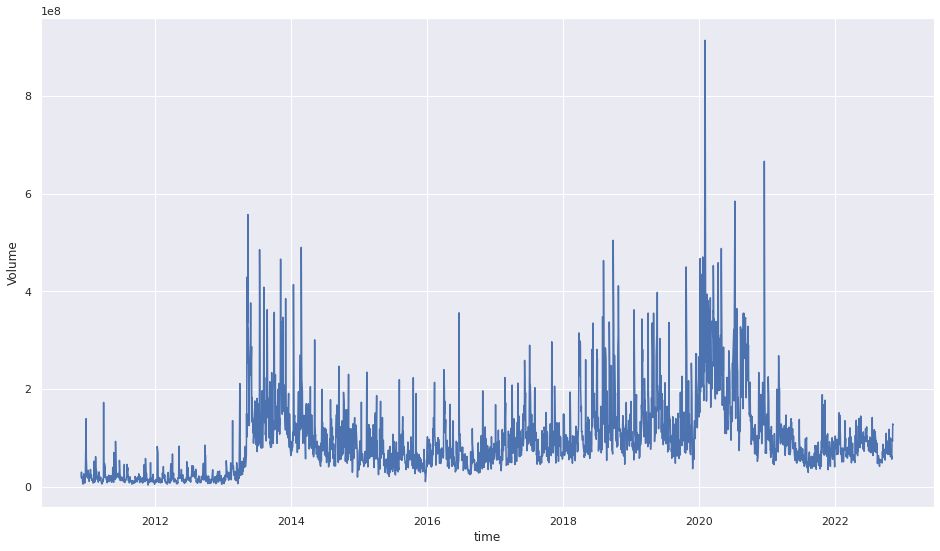

In [ ]:
# 거래량, 주가
import seaborn as sns

plt.figure(figsize=(16, 9))
sns.lineplot(y = tsla_df['Volume'], x = tsla_df.index)
plt.xlabel('time')
plt.ylabel('Volume')

Text(0, 0.5, 'Price')

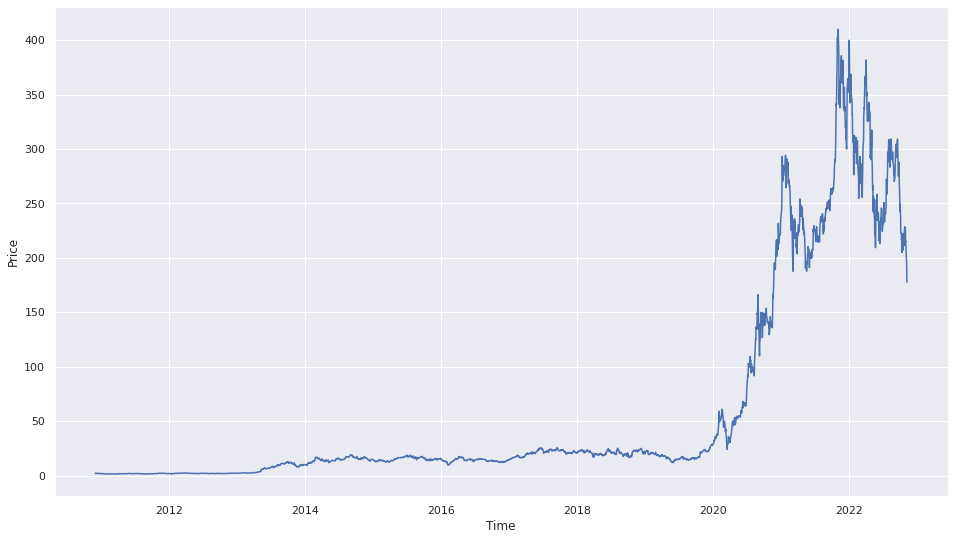

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y = tsla_df['Adj Close'], x = tsla_df.index)
plt.xlabel('Time')
plt.ylabel('Price')

In [75]:
# 거래량과 feature 의 상관계수 확인

# 이전에는 replay count 로는 sentiment를 확인하지 못한다 판단해서 뺐지만, 이건 상관관계이므로 포함시켜 계산
features['interest_cnt'] = features['reply count'] + features['commitment count']
print(features)
interest_cnt = features[['Date','interest_cnt']]
interest_cnt= interest_cnt.groupby('Date')['interest_cnt'].sum()
interest_cnt = interest_cnt.reset_index('Date')
interest_cnt['Date'] = pd.to_datetime(interest_cnt['Date'],format='%Y-%m-%d')
interest_cnt = interest_cnt.set_index('Date')
print(interest_cnt)
Volume = pd.DataFrame(tsla_df['Volume'])

# pandas merge 함수 사용하여 date를 기준으로 합치기
V_lr_df = pd.merge(interest_cnt, Volume, on= 'Date')
#V_lr_df = V_lr_df.rename(columns = {0: 'interest_cnt'})
print(V_lr_df)

features['Date'] = pd.to_datetime(features['Date'],format='%Y-%m-%d')
features = features.set_index('Date')
corr_ft = pd.merge(features, Volume, on = 'Date')

corr_ft.corr(method ='pearson')

             Date  reply count  retweet count  like count  \
0      2022-11-10          348            133        1557   
1      2022-11-10         1224            598        9464   
2      2022-11-09          496            122        2066   
3      2022-11-09         2253           1041       17872   
4      2022-11-09         1001            513       10904   
...           ...          ...            ...         ...   
17714  2011-12-03           28              9          52   
17715  2011-12-03           32             30          66   
17716  2011-12-01           29             13          76   
17717  2011-12-01           33             22         189   
17718  2010-06-04         1035            600        6116   

                      sentiment sentiment_str sentiment_num  sentiment_sr  \
0        ['neutral', 0.7305445]       neutral      0.730545             0   
1       ['neutral', 0.58761513]       neutral      0.587615             0   
2       ['positive', 0.5533905]     

,reply count,retweet count,like count,sentiment_sr,commitment count,sentiment_sr2,interest_cnt,Volume
reply count,1.000000,0.764695,0.835175,-0.048022,0.833422,-0.048022,0.848707,-0.065992
retweet count,0.764695,1.000000,0.928044,-0.039763,0.942037,-0.039763,0.940617,-0.029094
like count,0.835175,0.928044,1.000000,-0.033125,0.999219,-0.033125,0.998943,-0.040385
sentiment_sr,-0.048022,-0.039763,-0.033125,1.000000,-0.034056,1.000000,-0.035047,-0.004327
commitment count,0.833422,0.942037,0.999219,-0.034056,1.000000,-0.034056,0.999601,-0.039464
sentiment_sr2,-0.048022,-0.039763,-0.033125,1.000000,-0.034056,1.000000,-0.035047,-0.004327
interest_cnt,0.848707,0.940617,0.998943,-0.035047,0.999601,-0.035047,1.000000,-0.041141
Volume,-0.065992,-0.029094,-0.040385,-0.004327,-0.039464,-0.004327,-0.041141,1.000000


In [77]:
# 수정종가와의 상관계수 역시 확인해 보기
ycorr = pd.DataFrame(tsla_df_scaled['Adj Close'])
print(ycorr)
corr_ft2 = pd.merge(features, ycorr, on = 'Date')

corr_ft2.corr(method ='pearson')

            Adj Close
Date                 
2010-12-01   0.002043
2010-12-02   0.001717
2010-12-03   0.001576
2010-12-06   0.001384
2010-12-07   0.001588
...               ...
2022-11-03   0.523493
2022-11-04   0.504302
2022-11-07   0.478868
2022-11-08   0.464719
2022-11-09   0.431159

[3007 rows x 1 columns]


,reply count,retweet count,like count,sentiment_sr,commitment count,sentiment_sr2,interest_cnt,Adj Close
reply count,1.000000,0.764695,0.835175,-0.048022,0.833422,-0.048022,0.848707,0.223372
retweet count,0.764695,1.000000,0.928044,-0.039763,0.942037,-0.039763,0.940617,0.115701
like count,0.835175,0.928044,1.000000,-0.033125,0.999219,-0.033125,0.998943,0.189392
sentiment_sr,-0.048022,-0.039763,-0.033125,1.000000,-0.034056,1.000000,-0.035047,-0.047661
commitment count,0.833422,0.942037,0.999219,-0.034056,1.000000,-0.034056,0.999601,0.182873
sentiment_sr2,-0.048022,-0.039763,-0.033125,1.000000,-0.034056,1.000000,-0.035047,-0.047661
interest_cnt,0.848707,0.940617,0.998943,-0.035047,0.999601,-0.035047,1.000000,0.186429
Adj Close,0.223372,0.115701,0.189392,-0.047661,0.182873,-0.047661,0.186429,1.000000


# LSTM 모델 사용 
- 코드 참조: https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/

In [78]:
# lstm
TEST_SIZE = 200
WINDOW_SIZE = 60 

train = tsla_df_scaled[:-TEST_SIZE]
test = tsla_df_scaled[-TEST_SIZE:]

In [79]:
def make_dataset(data, label, window_size=60):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [80]:
from sklearn.model_selection import train_test_split

feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Adj Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 60)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((2197, 60, 4), (550, 60, 4))

In [81]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 4), (200, 1))

In [82]:
test_feature, test_label = make_dataset(test_feature, test_label, 60)
test_feature.shape, test_label.shape

((140, 60, 4), (140, 1))

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, #뉴런
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
# output layer
model.add(Dense(1)) # 주가를 예측하기 위해 1개의 출력값을 내보내기 위해

In [84]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=20, 
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
108/110 [============================>.] - ETA: 0s - loss: 0.0059
Epoch 1: val_loss improved from inf to 0.00035, saving model to model/tmp_checkpoint.h5
110/110 [==============================] - 5s 29ms/step - loss: 0.0058 - val_loss: 3.4780e-04
Epoch 2/200
109/110 [============================>.] - ETA: 0s - loss: 2.7620e-04
Epoch 2: val_loss improved from 0.00035 to 0.00025, saving model to model/tmp_checkpoint.h5
110/110 [==============================] - 3s 26ms/step - loss: 2.7478e-04 - val_loss: 2.5407e-04
Epoch 3/200
109/110 [============================>.] - ETA: 0s - loss: 2.1256e-04
Epoch 3: val_loss improved from 0.00025 to 0.00022, saving model to model/tmp_checkpoint.h5
110/110 [==============================] - 3s 26ms/step - loss: 2.1178e-04 - val_loss: 2.2388e-04
Epoch 4/200
109/110 [============================>.] - ETA: 0s - loss: 1.9785e-04
Epoch 4: val_loss improved from 0.00022 to 0.00020, saving model to model/tmp_checkpoint.h5
110/110 [=============

In [85]:
model.load_weights(filename)
pred = model.predict(test_feature) # 예측값 저장

pred.shape

5/5 [==============================] - 0s 7ms/step


(140, 1)

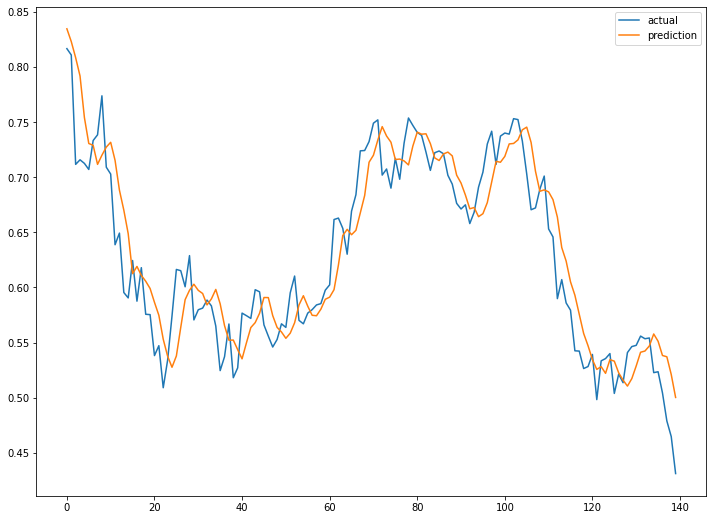

In [86]:
# 실제값과 예측값 비교 plot 그려보기
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

# lstm 모델에 시나리오 2번으로 만든 x 더하여 계산해보기

In [90]:
# lstm
TEST_SIZE = 200
WINDOW_SIZE = 20

sent_train = pd.merge(tsla_df_scaled, x2, how = 'left', left_index = True, right_index = True)
sent_train = sent_train.loc[sent_train.index >= '2011-12-01']  # 2011년 12월 1일까지 sentiment에 관한 data 없기 때문
sent_train.fillna(method = 'ffill', inplace = True) # nan값은 앞방향으로 채우기
print(sent_train)

train = sent_train[:-TEST_SIZE]
test = sent_train[-TEST_SIZE:]


                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2011-12-01  0.001754  0.001892  0.001793  0.001758   0.001758  0.013025   
2011-12-02  0.001797  0.001843  0.001862  0.001872   0.001872  0.009279   
2011-12-05  0.001910  0.002055  0.002032  0.002055   0.002055  0.015165   
2011-12-06  0.002019  0.002052  0.002131  0.002128   0.002128  0.011733   
2011-12-07  0.002089  0.002037  0.002093  0.002017   0.002017  0.007162   
...              ...       ...       ...       ...        ...       ...   
2022-11-03  0.511948  0.531983  0.516334  0.523493   0.523493  0.058150   
2022-11-04  0.539362  0.538278  0.498870  0.504302   0.504302  0.104185   
2022-11-07  0.505339  0.502202  0.482989  0.478868   0.478868  0.099202   
2022-11-08  0.469657  0.469031  0.458475  0.464719   0.464719  0.137519   
2022-11-09  0.461755  0.470701  0.434653  0.431159   0.431159  0.135607   

            sentiment_sr

In [91]:
from sklearn.model_selection import train_test_split

feature_cols = ['Open', 'High', 'Low', 'Volume', 'sentiment_sr2']
label_cols = ['Adj Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 60)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1995, 60, 5), (499, 60, 5))

In [92]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 5), (200, 1))

In [93]:
test_feature, test_label = make_dataset(test_feature, test_label, 60)
test_feature.shape, test_label.shape

((140, 60, 5), (140, 1))

In [94]:
model2 = Sequential()
model2.add(LSTM(16, #뉴런
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
# output layer
model2.add(Dense(1)) # 주가를 예측하기 위해 1개의 출력값을 내보내기 위해

In [95]:
import os

model2.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path2 = 'model2'
filename = os.path.join(model_path2, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model2.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=20, 
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
100/100 [==============================] - ETA: 0s - loss: 0.0121
Epoch 1: val_loss improved from inf to 0.00139, saving model to model2/tmp_checkpoint.h5
100/100 [==============================] - 9s 36ms/step - loss: 0.0121 - val_loss: 0.0014
Epoch 2/200
 98/100 [============================>.] - ETA: 0s - loss: 8.2380e-04
Epoch 2: val_loss improved from 0.00139 to 0.00045, saving model to model2/tmp_checkpoint.h5
100/100 [==============================] - 3s 26ms/step - loss: 8.1515e-04 - val_loss: 4.4646e-04
Epoch 3/200
 98/100 [============================>.] - ETA: 0s - loss: 4.9944e-04
Epoch 3: val_loss improved from 0.00045 to 0.00033, saving model to model2/tmp_checkpoint.h5
100/100 [==============================] - 2s 25ms/step - loss: 4.9539e-04 - val_loss: 3.3298e-04
Epoch 4/200
 99/100 [============================>.] - ETA: 0s - loss: 4.0537e-04
Epoch 4: val_loss improved from 0.00033 to 0.00028, saving model to model2/tmp_checkpoint.h5
100/100 [=============

In [96]:
model2.load_weights(filename)
pred2 = model2.predict(test_feature) # 예측값 저장

pred2.shape

5/5 [==============================] - 0s 7ms/step


(140, 1)

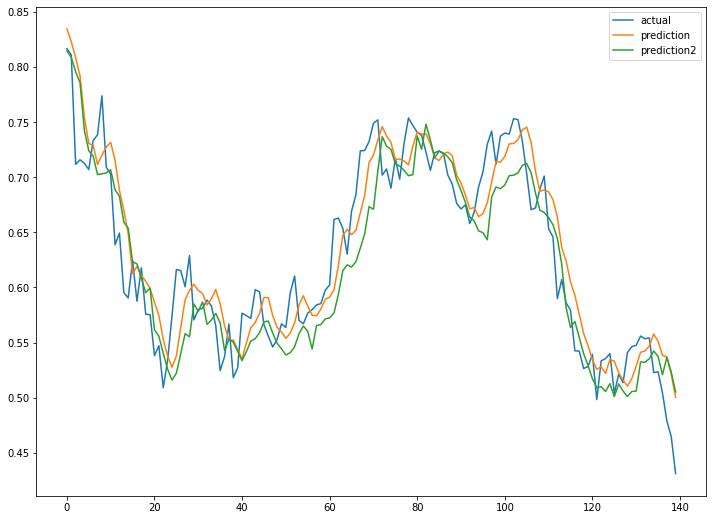

In [97]:
# 실제값과 예측값 비교 plot 그려보기
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.plot(pred2, label = 'prediction2')
plt.legend()
plt.show()

# 추후 연구 과제: lstm + sentiment analysis + RSI(상대 강도지수)
- RSI: 가격의 상승압력과 하락압력 간의 상대적인 강도 = 종가의 변화로 추세 강도를 측정하는 선행지표, 추세의 강도(힘)으르 보여줌
- RSI = RS/ (1 + RS) = AU / (AU + AD)

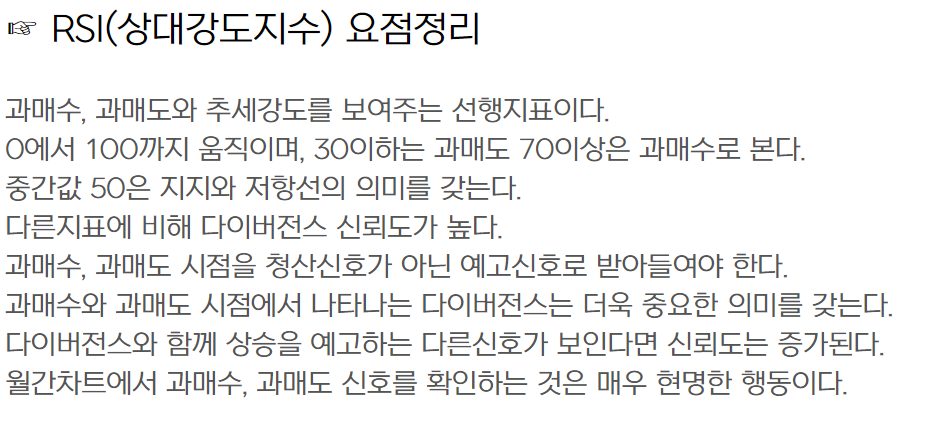

In [ ]:
# 상대강도지수(RSI): RSI 는 가격의 상승압력과 하락압력 간의 상대적인 강도, 
# 즉, 종가의 변화로 추세 강도를 측정하는 선행지표, 추세의 강도(힘)으르 보여줌
# 현재 추세의 힘이 어떠한지를 0~100% 수치로 나타낸다. 
# 과매수, 과매도 상태를 알려줌 > RSI 로 다이버전스를 분석하는 것이 일반적 > 주가가 이전 지점을 이탈하는 데도 rsi 가 이전지점을 이탈하지 않는다면 상승전환 예상
# - 가격이 전일 가격보다 상승한 날의 상승분은 U
# - 가격이 전일 가격보다 하락한 날의 하락분은 D
# U, D의 평균값을 구하여 AU / AD = RS
# RS 값이 크다 = 일정기간동안 하락한 폭 < 상승폭
# RSI = RS/ (1 + RS) = AU / (AU + AD)

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go 
import plotly.subplots as ms 
import plotly.express as px

U = np.where(df_samsung['종가'].diff(1) > 0, df_samsung['종가'].diff(1), 0) 
D = np.where(df_samsung['종가'].diff(1) < 0, df_samsung['종가'].diff(1) *(-1), 0) 
AU = pd.DataFrame(U, index=df_samsung.index).rolling(window=14).mean() 
AD = pd.DataFrame(D, index=df_samsung.index).rolling(window=14).mean() 
RSI = AU / (AD+AU) *100 
df_samsung['RSI'] = RSI
df_samsung['RSI_signal'] = df_samsung["RSI"].rolling(6).mean()

#RSI 추가하기
RSI = go.Scatter(x=df_samsung.index, y=df_samsung['RSI'], line=dict(color='red', width=2), name='RSI', legendgroup='group5', legendgrouptitle_text='RSI')